# Introduction to Retail Customer Segmentation Project
## This project consists of 3 parts: Data Preprocessing, Exploratory Analysis, and RFM Scores.
The RFM scores are used to identify which category the customers belong to, to prioritize customers for strategic planning purposes to launch marketing campaign based on those that fall in the category of don't lose them, keep them interested and loyal customers et cetera.
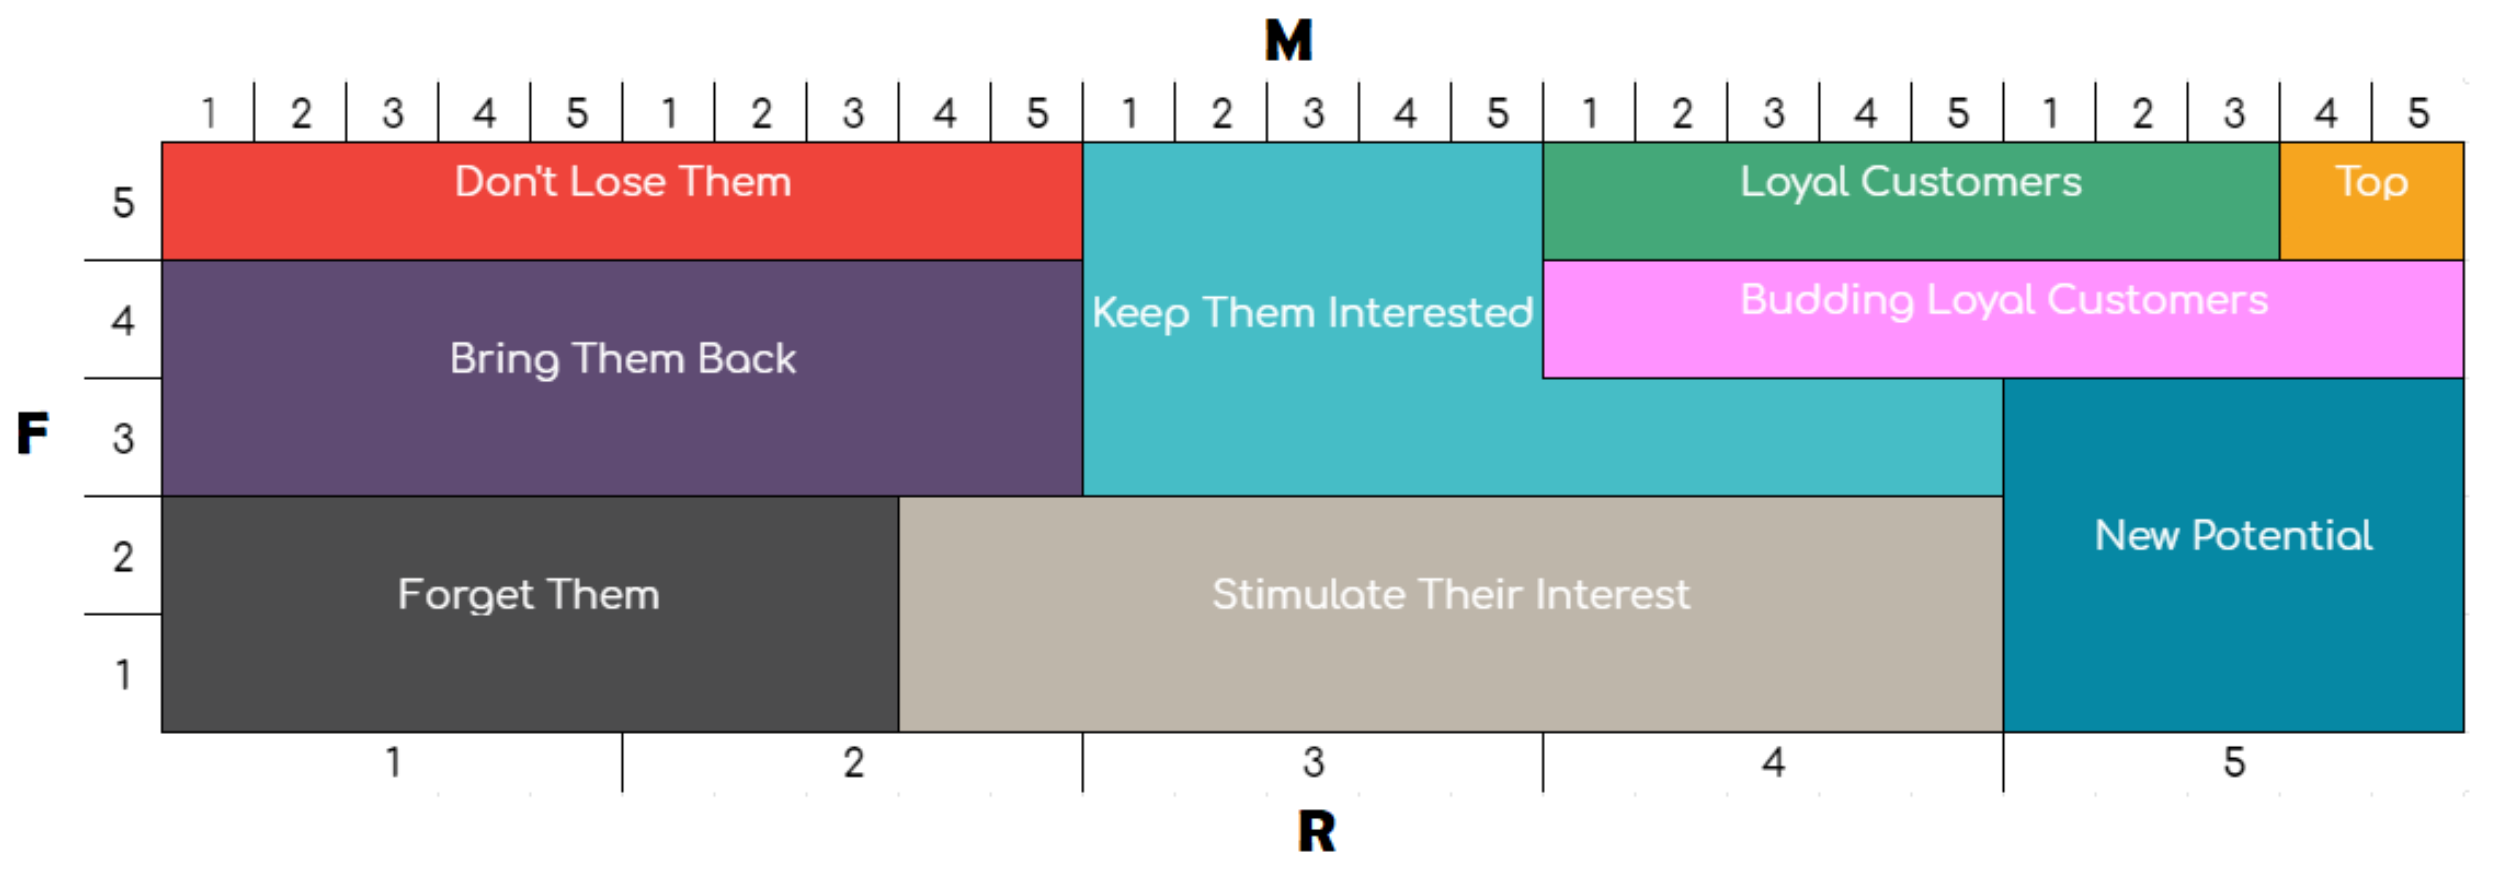

# Part 1: Data Preprocessing

In [86]:
#-------------------------------------------------------------------------------
# Project Name:        Retail Customer Segmentation
# Created:     01-10-2022
#-------------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def import_data():

    # TODO: import the dataset
    trans_data = pd.read_csv('./transaction_data.csv')
    trans_data = pd.DataFrame(trans_data)

    # TODO: find the number of the rows and columns of the dataset
    rows, columns = trans_data.shape

    # TODO: get the first 5 rows of the dataset
    trans_data_head = trans_data.head(5)
    
    return rows, columns, trans_data, trans_data_head #result is a tuple
def missing_values(trans_data):

    # TODO: calculate the number of missing values for each variable of the dataset
    var_missing_values = trans_data.isnull().sum()
    return var_missing_values


## Note: What each column in the data means
**household_key :** uniquely identifies each household <br />
**BASKET_ID :** uniquely identifies each invoice <br />
**PRODUCT_ID :** uniquely identifies each product <br />
**QUANTITY :** number of the products purchased <br />
**STORE_ID:** uniquely identifies each store <br />
**WEEK_NO, DAY, TRANS_TIME :** show the week, day and time of the purchase <br />
**SALES_VALUE :** the amount of money that the retailer receives from sale <br />
**RETAIL_DISC:** in case a customer has a loyalty card, then this variable shows the amount of discount applied to that sale <br />
**COUPON_DISC:** it shows the amount of discount applied to the sale thanks to the coupons from manufacturers. The retailer will get this amount back from them, meaning it doesn't affect SALES_VALUE <br />
**COUPON_MATCH_DISC:** it shows the amount of discount applied by manufacturer to the retailer.


In [2]:
x = import_data()
missing_values(x[2])

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

## Note 
number of rows in the dataset are 2,595,732

In [3]:
x[0]

2595732

In [4]:
#as you must have noticed the column names are inconsistent case for names (upper and lower)
def rename_columns(trans_data):

    # TODO: change all the column names to lowercase
    trans_data_prep_1 = trans_data.rename(columns=str.lower)

    return trans_data_prep_1

## Note

Notice that the values for retail_disc, coupon_disc and coupon_match_disc are **negative**

In [5]:
trans_data_prep_1 = rename_columns(x[2])
trans_data_prep_1.loc[(trans_data_prep_1['household_key']==1351) & (trans_data_prep_1['day']==23) & (trans_data_prep_1['product_id']==1075214)]

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
12657,1351,27254731647,23,1075214,1,5.54,447,-3.0,1751,4,-0.55,-0.45


In [6]:
def get_absolutes(trans_data_prep_1):

    # TODO: create new dataframe with absolute values of the columns
    disc_df_abs = abs(trans_data_prep_1[['retail_disc', 'coupon_disc', 'coupon_match_disc']])

    # TODO: drop the columns from the initial data
    dropped_df = trans_data_prep_1.drop(['retail_disc', 'coupon_disc', 'coupon_match_disc'], axis =1) #axis = 1, means to drop the col

    # TODO: concatenate dropped_df and disc_df_abs
    trans_data_prep_2 = pd.concat([dropped_df,disc_df_abs],axis=1)

    return trans_data_prep_2

## Note

Notice that the values for retail_disc, coupon_disc and coupon_match_disc are now **positive** <br />

### Reason for making the values of the 3 cols (retail_disc, coupon_disc and coupon_match_disc) positive

Recall that the sales_value column represents that the value that the retailer receives for a product <br />
Now if we want to calculate the shelf price for the product we would want these columns' value to be positive to make the calculation easier  to do

In [7]:
trans_data_prep_2 = get_absolutes(trans_data_prep_1)
trans_data_prep_2.loc[(trans_data_prep_2['household_key']==1351) & (trans_data_prep_2['day']==23) & (trans_data_prep_2['product_id']==1075214)]

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,trans_time,week_no,retail_disc,coupon_disc,coupon_match_disc
12657,1351,27254731647,23,1075214,1,5.54,447,1751,4,3.0,0.55,0.45


In [8]:
def add_column(trans_data_prep_2):

    # TODO: create series object that shows the amount paid by a customer
    amount_paid = pd.Series(data=trans_data_prep_2['sales_value']-trans_data_prep_2['coupon_disc'], name='amount_paid')

    # TODO: concatenate trans_data_prep_2 and amount_paid
    trans_data_prep_3 = pd.concat([trans_data_prep_2, amount_paid],axis=1)

    return trans_data_prep_3

In [9]:
trans_data_prep_3 = add_column(trans_data_prep_2)
trans_data_prep_3.loc[trans_data_prep_3['coupon_disc']>0]

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,trans_time,week_no,retail_disc,coupon_disc,coupon_match_disc,amount_paid
129,718,26985360571,1,830503,1,2.99,324,1115,1,1.00,1.00,0.00,1.99
134,718,26985360571,1,855325,1,1.10,324,1115,1,0.69,0.40,0.40,0.70
151,718,26985360571,1,934676,1,1.37,324,1115,1,0.42,1.00,0.00,0.37
154,718,26985360571,1,948756,3,2.12,324,1115,1,0.90,0.75,0.25,1.37
160,718,26985360571,1,965292,2,3.50,324,1115,1,1.28,1.00,0.00,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595361,1823,42289906117,711,1134790,1,3.39,402,1334,102,0.00,0.70,0.30,2.69
2595363,1823,42289906117,711,6979803,1,3.69,402,1334,102,0.00,0.50,0.50,3.19
2595369,1823,42289906117,711,17249766,1,2.56,402,1334,102,0.00,1.00,0.00,1.56
2595589,303,42289918892,711,5978656,0,0.00,343,1513,102,0.00,1.00,0.00,-1.00


## Note: Removing unnecessary columns

Recall **coupon_match_disc** is the discount that the manufacturer gave to the retailer, this info is useful if we want to know the actual price of the product. But this is not the area of our interest, our interest lies with the customer <br />
**trans_time** is also an unnecessary info as we can get sufficient info about time via **week_no** & **day** columns


In [10]:
def drop_columns(trans_data_prep_3):

    # TODO: drop irrelevant variables
    trans_data_prep_final = trans_data_prep_3.drop(['trans_time','coupon_match_disc'],axis=1)

    return trans_data_prep_final

In [11]:
trans_data_prep_final = drop_columns(trans_data_prep_3)

# Part 2: Exploratory Data Analysis

In [12]:
#determining # of unique stores

In [13]:
def calc_unique_stores(data):

    # TODO: find unique stores by store_id 
    unique_stores = data['store_id'].nunique()

    return unique_stores

In [14]:
unique_stores = calc_unique_stores(trans_data_prep_final)
print(unique_stores)

582


In [15]:
trans_data_prep_final

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,week_no,retail_disc,coupon_disc,amount_paid
0,2375,26984851472,1,1004906,1,1.39,364,1,0.60,0.0,1.39
1,2375,26984851472,1,1033142,1,0.82,364,1,0.00,0.0,0.82
2,2375,26984851472,1,1036325,1,0.99,364,1,0.30,0.0,0.99
3,2375,26984851472,1,1082185,1,1.21,364,1,0.00,0.0,1.21
4,2375,26984851472,1,8160430,1,1.50,364,1,0.39,0.0,1.50
...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.0,0.99
2595728,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.0,8.89
2595729,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.0,6.99
2595730,1598,42305362535,711,6923644,1,4.50,3228,102,0.49,0.0,4.50


## Note: Now for each store, we want to look up the number of households who shopped there, as well as how much money was spent.

In [30]:
def group_data(data):

    # TODO: group and aggregate the data
    data_grouped = data.groupby(['store_id']).agg({'household_key':'count','amount_paid':'sum'})

    # TODO: rename the 'household_key' column
    data_renamed = data_grouped.rename(columns = {'household_key':'household_count'})

    # TODO: reset the index of the dataframe to have 'store_id' as a column rather than the index
    data_reset = data_renamed.reset_index()

    return data_reset

In [37]:
data_reset = group_data(trans_data_prep_final)
#data_reset = group_data(trans_data_prep_final)
#print(data_reset)

In [45]:
def sort_data(data_grouped):

    # TODO: sort by 'household_count' in descending order
    data_sorted_1 = data_grouped.sort_values(by='household_count',ascending=False)

    # TODO: sort by 'amount_paid' by descending order
    data_sorted_2 = data_grouped.sort_values(by='amount_paid',ascending=False)

    # print out a preview of the datasets

    print('the data sorted by household_count')
    print(data_sorted_1.head(), '\n')

    print('the data sorted by amount_paid')
    print(data_sorted_2.head())

    return data_sorted_1, data_sorted_2

In [47]:
#data_reset['household_count']
sort_data_res = sort_data(data_reset) #result is a tuple

the data sorted by household_count
     store_id  household_count  amount_paid
118       367            75573    266515.46
139       406            59331    215468.67
108       356            49332    136911.21
127       381            45268    132276.00
67        292            45240    129420.32 

the data sorted by amount_paid
     store_id  household_count  amount_paid
118       367            75573    266515.46
139       406            59331    215468.67
112       361            41101    144225.74
151       429            30802    141947.06
102       343            41348    139672.25


In [58]:
#just to check if the results from group_data_2 method make sense or nah
trans_data_prep_final.loc[(trans_data_prep_final['household_key']==1)]

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,week_no,retail_disc,coupon_disc,amount_paid
46996,1,27601281299,51,825123,1,3.99,436,8,0.00,0.0,3.99
46997,1,27601281299,51,831447,1,2.99,436,8,0.00,0.0,2.99
46998,1,27601281299,51,840361,1,1.09,436,8,0.30,0.0,1.09
46999,1,27601281299,51,845307,1,3.71,436,8,0.62,0.0,3.71
47000,1,27601281299,51,852014,1,2.79,436,8,1.20,0.0,2.79
...,...,...,...,...,...,...,...,...,...,...,...
2575488,1,42229641145,706,9527558,1,2.99,436,102,1.20,0.0,2.99
2575489,1,42229641145,706,12352312,1,2.99,436,102,1.20,0.0,2.99
2575490,1,42229641145,706,13095136,1,6.49,436,102,0.00,0.0,6.49
2575491,1,42229641145,706,15801136,1,1.50,436,102,0.29,0.0,1.50


In [59]:
#sanity check for result obtained from group_data_2 cux from the result of the above statement it didn't seem possible for amount_paid sum to be 4249.6
trans_data_prep_final.loc[(trans_data_prep_final['household_key']==1),'amount_paid'].sum()

4249.6

## Note: Determining household spending habits by checking how much is spent by each household 

In [48]:
def group_data_2(data):

    # TODO: group and aggregate the data
    data_grouped_2 = data.groupby(['household_key']).agg({'retail_disc':'sum','coupon_disc':'sum','amount_paid':'sum'})

    # TODO: reset the index of the dataframe to have 'household_key' as a column rather than the index
    data_reset_2 = data_grouped_2.reset_index()

    return data_reset_2

In [60]:
data_grouped_2=group_data_2(trans_data_prep_final)

In [61]:
def describe_grouped_data(data_grouped_2):

    # TODO: use the describe method on the input
    data_desc = data_grouped_2.describe()

    return data_desc

In [62]:
describe_grouped_data(data_grouped_2)

,household_key,retail_disc,coupon_disc,amount_paid
count,2500.00000,2500.000000,2500.000000,2500.000000
mean,1250.50000,559.340760,17.044616,3205.940616
std,721.83216,565.715103,41.401314,3330.002039
min,1.00000,0.250000,0.000000,8.170000
25%,625.75000,165.080000,0.000000,965.127500
50%,1250.50000,388.535000,3.595000,2149.115000
75%,1875.25000,756.620000,14.205000,4392.990000
max,2500.00000,4668.590000,509.830000,38240.650000


## Insights: 
**Recall:** coupon_disc is discount provided from manufacturer to retailer, retail_disc is discount provided by retailer to customer <br />
From this we can determine that the retailer provided much better discounts compared to the manfacturer <br />
The max amount spent by a household is $38,240.65. <br />
The mean amount_paid by a household is $3,205.94, we can tell that at least 553.62 households spent at least $3,205.94. <br />
The 50 percentile is same as the median ($2,149.11), looking at that we can infer that less than half of the households spent at least the average amount.


# Part 3: Recency, Frequency, and Monetary (RFM) scores

## Note Calculating the R Score, F Score and M Score
**Recency score:** how recent a purchase was made by a customer <br />
The recent the purchase the higher the R score <br />
**Importance of Recency-score:** customers with high R scores are more likely to successively make another purchase <br /> <br />
**Frequency score:** how often a customer makes a purchase, higher the frequency of purchases higher the F scroe <br />
**Importance of Frequency-score:** help predict the purchasing cycle and when to advertise to consumers <br />  <br />
**Monetary Score:** how much money a customer spends, and spending more results in a higher M score, higher the spending higher the monetary score <br />
**Importance of Monetary Score:** customers that spend more have means to continue spending more hence we can prioritize these customers

In [114]:
def get_RFM_scores(data):

    # R scores
    household_purchase_last = data.groupby('household_key')['day'].max()
    # TODO: cut the grouped dataset into 5 quintiles
    R_scores = pd.qcut(household_purchase_last, q=5, labels=range(1, 6))
    # TODO: add the R score to the RFM score dataset
    RFM_scores = R_scores.to_frame(name="R")

    # F scores
    # TODO: use the groupby method to group the unique visits by each household
    household_purchase_frequency = data.groupby(
        'household_key')['basket_id'].nunique()
    # TODO: cut the grouped dataset into 5 quintiles
    F_scores = pd.qcut(household_purchase_frequency, q=5, labels=range(1, 6))
    # TODO: add the F score to the RFM score dataset
    RFM_scores = RFM_scores.assign(F=F_scores.values)
    
    # M scores
    # TODO: use the groupby method to find the sum of the amount paid by each household
    household_money_spent = data.groupby('household_key')['amount_paid'].sum()
    # TODO: cut the grouped dataset into 5 quintiles
    M_scores = pd.qcut(household_money_spent, q=5, labels = range(1,6))
    # TODO: add the M score to the RFM score dataset
    RFM_scores = RFM_scores.assign(M = M_scores.values)

    return RFM_scores

In [115]:
RFM_scores = get_RFM_scores(trans_data_prep_final)
RFM_scores

,R,F,M
household_key,,,
1,3,3,4
2,1,2,3
3,3,2,3
4,1,1,2
5,3,2,2
...,...,...,...
2496,1,3,4
2497,2,5,5
2498,4,5,3


## Note: Wrangling data to be able to create histogram as histogram takes numeric values

In [116]:
RFM_scores.dtypes
#RFM_scores['R'].unique()
#RFM_scores.plot()

R    category
F    category
M    category
dtype: object

Text(0.5, 1.0, 'Recency Score Histogram')

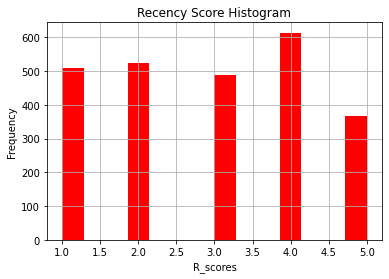

In [106]:
RFM_scores['R'] = RFM_scores['R'].astype('float')
RFM_scores['F'] = RFM_scores['F'].astype('float')
RFM_scores['R'].hist(grid=True,bins='auto',align='mid',color='red')
plt.xlabel("R_scores")
plt.ylabel("Frequency")
plt.title("Recency Score Histogram")

Text(0.5, 1.0, 'Frequency Score Histogram')

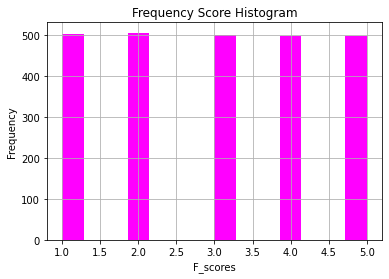

In [111]:
RFM_scores['F'].hist(grid=True,bins='auto',align='mid',color='magenta')
plt.xlabel("F_scores")
plt.ylabel("Frequency")
plt.title("Frequency Score Histogram")
    

Text(0.5, 1.0, 'Monetary Score Histogram')

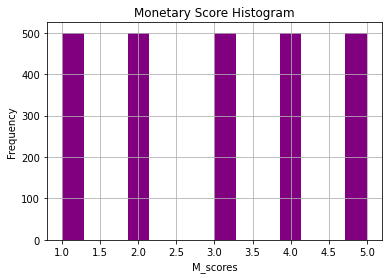

In [117]:
RFM_scores['M'].hist(grid=True,bins='auto',align='mid',color='purple')
plt.xlabel("M_scores")
plt.ylabel("Frequency")
plt.title("Monetary Score Histogram")

## customer prioritization chart based on RFM score
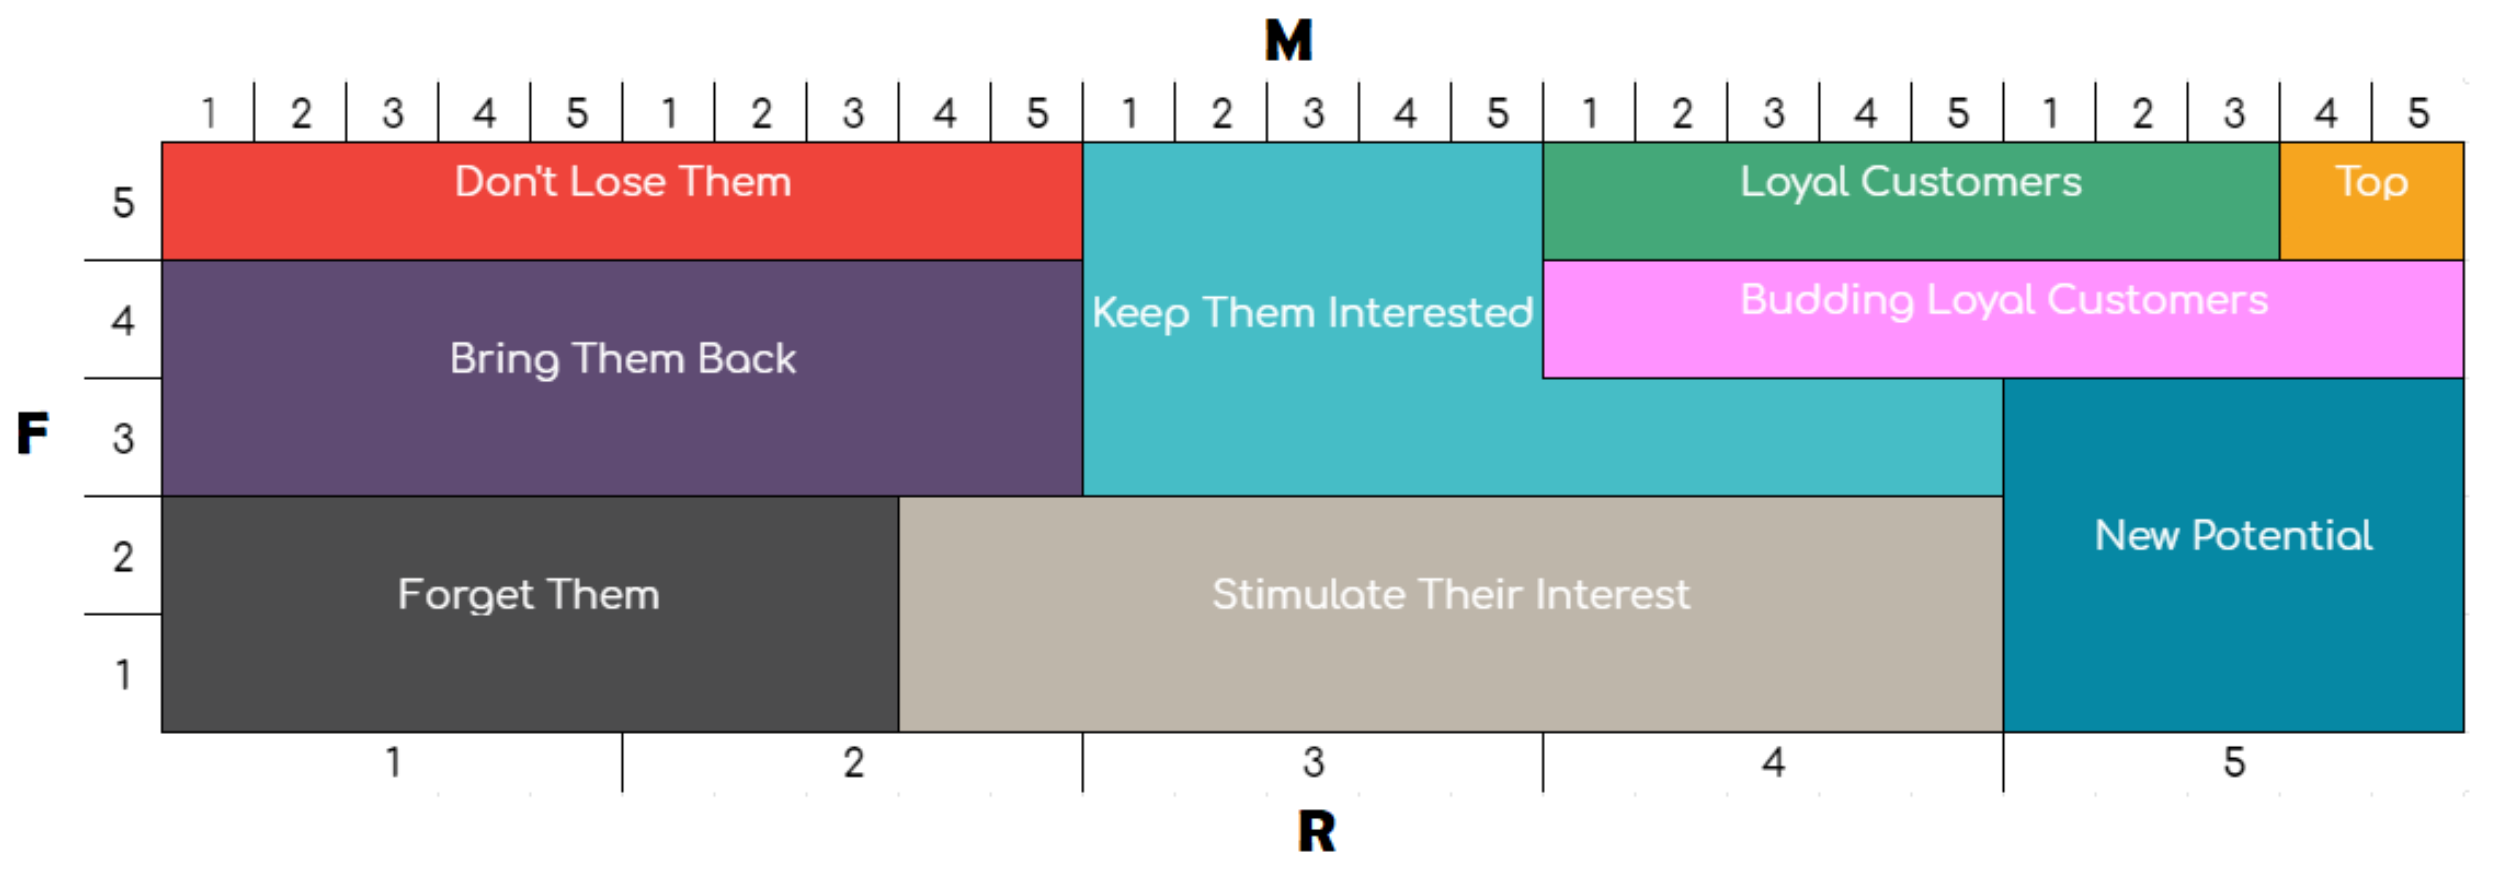